<b>Contents:</b>

[1 Load Dataset](#Load-Dataset)

[2  Explore the datasets 2014, 2015 и 2016 years structure](#section_2)

[3  Load all data for 2014 year](#section_3)

[4  Change data type to date and filter dataset](#section_4)

[5  Check file info](#section_5)

[6  Group data to aggregate only trips from 1231 region](#section_6)

In [1]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Asus\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Dataset

In [43]:
regions=pd.read_csv('regions.csv', sep=(';'))
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


<a id='section_2'></a>
# Explore the datasets 2014, 2015 и 2016 years structure

## Create data types dictionary from the results of Part_1_data_preprocessing_year

In [42]:
dtypes = {
 'VendorID': np.uint8,
 'tpep_pickup_datetime': np.str,
 'tpep_dropoff_datetime': np.str,
 'passenger_count': np.uint8,
 'trip_distance': np.float32,
 'pickup_longitude': np.float32,
 'pickup_latitude': np.float32,
 'RatecodeID': np.uint8,
 'store_and_fwd_flag': np.str,
 'dropoff_longitude': np.float32,
 'dropoff_latitude': np.float32,
 'payment_type': np.float64,
 'fare_amount': np.float32,
 'extra': np.float32,
 'mta_tax': np.float32,
 'tip_amount': np.float32,
 'tolls_amount': np.float32,
 'improvement_surcharge': np.float32,
 'total_amount': np.float32,
}

In [44]:
ddf_14_05=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\Data_14_2\yellow_tripdata_2014-05.csv", dtype=dtypes)
ddf_14_06=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\Data_14_2\yellow_tripdata_2014-06.csv", dtype=dtypes)
ddf_14_07=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\yellow_tripdata_2014-07.csv", dtype=dtypes)
ddf_14_08=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\yellow_tripdata_2014-08.csv", dtype=dtypes)
ddf_14_09=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\yellow_tripdata_2014-09.csv", dtype=dtypes)
ddf_14_10=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\yellow_tripdata_2014-10.csv", dtype=dtypes)
ddf_14_11=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\yellow_tripdata_2014-11.csv", dtype=dtypes)
ddf_14_12=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_14\yellow_tripdata_2014-12.csv", dtype=dtypes)

ddf_15_01=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\Data_15_2\yellow_tripdata_2015-01.csv", dtype=dtypes)
ddf_15_02=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\Data_15_2\yellow_tripdata_2015-02.csv", dtype=dtypes)
ddf_15_03=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-03.csv", dtype=dtypes)
ddf_15_04=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-04.csv", dtype=dtypes)
ddf_15_05=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-05.csv", dtype=dtypes)
ddf_15_06=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-06.csv", dtype=dtypes)
ddf_15_07=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-07.csv", dtype=dtypes)
ddf_15_08=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-08.csv", dtype=dtypes)
ddf_15_09=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-09.csv", dtype=dtypes)
ddf_15_10=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-10.csv", dtype=dtypes)
ddf_15_11=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-11.csv", dtype=dtypes)
ddf_15_12=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\yellow_tripdata_2015-12.csv", dtype=dtypes)

ddf_16_01=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_16\Data_16_2\yellow_tripdata_2016-01.csv", dtype=dtypes)
ddf_16_02=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_16\Data_16_2\yellow_tripdata_2016-02.csv", dtype=dtypes)
ddf_16_03=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_16\yellow_tripdata_2016-03.csv", dtype=dtypes)
ddf_16_04=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_16\yellow_tripdata_2016-04.csv", dtype=dtypes)
ddf_16_05=dd.read_csv("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_16\yellow_tripdata_2016-05.csv", dtype=dtypes)


## Checking common column names  in all datasets

In [45]:
from functools import reduce

columns = [set(ddf_14_05.columns),
    set(ddf_14_06.columns),
    set(ddf_14_07.columns),
    set(ddf_14_08.columns),
    set(ddf_14_09.columns),
    set(ddf_14_10.columns),
    set(ddf_14_11.columns),
    set(ddf_14_12.columns),
    set(ddf_15_01.columns),
    set(ddf_15_02.columns),
    set(ddf_15_03.columns),
    set(ddf_15_04.columns),
    set(ddf_15_05.columns),       
    set(ddf_15_06.columns),
    set(ddf_15_07.columns),
    set(ddf_15_08.columns),
    set(ddf_15_09.columns),
    set(ddf_15_10.columns),
    set(ddf_15_11.columns),
    set(ddf_15_12.columns), 
    set(ddf_16_01.columns),
    set(ddf_16_02.columns),
    set(ddf_16_03.columns),
    set(ddf_16_04.columns),
    set(ddf_16_05.columns)]
common_columns_int = list(reduce(lambda a, i: a.intersection(i), columns))
common_columns_int

[]

No such names

## Check all column names in all dataset sets

In [46]:
common_columns_un = list(reduce(lambda a, i: a.union(i), columns))
common_columns_un

['store_and_fwd_flag',
 'improvement_surcharge',
 'dropoff_longitude',
 ' fare_amount',
 'fare_amount',
 'trip_distance',
 ' tip_amount',
 'tolls_amount',
 ' surcharge',
 'pickup_longitude',
 'dropoff_latitude',
 'total_amount',
 'passenger_count',
 ' payment_type',
 ' pickup_latitude',
 'pickup_latitude',
 ' mta_tax',
 ' dropoff_latitude',
 ' store_and_fwd_flag',
 'tpep_dropoff_datetime',
 ' trip_distance',
 ' dropoff_datetime',
 'extra',
 ' tolls_amount',
 'tpep_pickup_datetime',
 'VendorID',
 'vendor_id',
 'payment_type',
 'RateCodeID',
 'RatecodeID',
 ' pickup_datetime',
 'tip_amount',
 ' total_amount',
 'mta_tax',
 ' rate_code',
 ' pickup_longitude',
 ' dropoff_longitude',
 ' passenger_count']

In [47]:
from IPython.display import display_html
def display_frames(frames, num_spaces=0):
    t_style = '<table style="display: inline;"'
    tables_html = [df.to_html().replace('<table', t_style)
        for df in frames]
    space = '&nbsp;' * num_spaces
    display_html(space.join(tables_html), raw=True)

### Put the column names next to each year and compare

In [48]:
stock_tables = [ddf_14_05.columns.to_frame(),ddf_15_05.columns.to_frame(),ddf_16_05.columns.to_frame()]
display_frames(stock_tables)

,0
vendor_id,vendor_id
pickup_datetime,pickup_datetime
dropoff_datetime,dropoff_datetime
passenger_count,passenger_count
trip_distance,trip_distance
pickup_longitude,pickup_longitude
pickup_latitude,pickup_latitude
rate_code,rate_code
store_and_fwd_flag,store_and_fwd_flag
dropoff_longitude,dropoff_longitude


In [49]:
ddf_14_05.columns

Index(['vendor_id', ' pickup_datetime', ' dropoff_datetime',
       ' passenger_count', ' trip_distance', ' pickup_longitude',
       ' pickup_latitude', ' rate_code', ' store_and_fwd_flag',
       ' dropoff_longitude', ' dropoff_latitude', ' payment_type',
       ' fare_amount', ' surcharge', ' mta_tax', ' tip_amount',
       ' tolls_amount', ' total_amount'],
      dtype='object')

In [50]:
ddf_15_05.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [51]:
ddf_16_05.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

### Delete the columns not found in all datasets

In [52]:
list_1_to_drop_columns=[' surcharge']
list_2_to_drop_columns=['extra', 'improvement_surcharge']

In [53]:
ddf_14_05_raw = ddf_14_05.drop(list_1_to_drop_columns, axis=1)
ddf_15_05_raw = ddf_15_05.drop(list_2_to_drop_columns, axis=1)
ddf_16_05_raw = ddf_16_05.drop(list_2_to_drop_columns, axis=1)

In [54]:
stock_tables = [ddf_14_05_raw.columns.to_frame(),ddf_15_05_raw.columns.to_frame(),ddf_16_05_raw.columns.to_frame()]
display_frames(stock_tables)

,0
vendor_id,vendor_id
pickup_datetime,pickup_datetime
dropoff_datetime,dropoff_datetime
passenger_count,passenger_count
trip_distance,trip_distance
pickup_longitude,pickup_longitude
pickup_latitude,pickup_latitude
rate_code,rate_code
store_and_fwd_flag,store_and_fwd_flag
dropoff_longitude,dropoff_longitude


In [55]:
common_columns=ddf_16_05.columns

In [56]:
common_columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [57]:
raw_data_1=dd.read_csv("D:/Asus/Work_DATA/Taxi/Downloads_DATA/Data_15/*.csv", dtype=dtypes)
raw_data_1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
npartitions=365,,,,,,,,,,,,,,,,,,,
,uint8,object,object,uint8,float32,float32,float32,int64,object,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


<a id='section_3'></a>
# Load all data for 2015 year

In [58]:
raw_data_3 = raw_data_1.drop(['extra'], axis=1)
raw_data_2 = raw_data_3.rename(columns={'RateCodeID':'RatecodeID'})

In [59]:
with ProgressBar():
    display(raw_data_2.tail())


[########################################] | 100% Completed |  0.2s


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
27191,2,2015-12-31 23:59:56,2016-01-01 00:08:18,5,1.20,-73.993813,40.720871,1,N,-73.986214,40.722469,1.0,7.5,0.5,1.76,0.0,0.3,10.56
27192,1,2015-12-31 23:59:58,2016-01-01 00:05:19,2,2.00,-73.965271,40.760281,1,N,-73.939514,40.752388,2.0,7.5,0.5,0.00,0.0,0.3,8.80
27193,1,2015-12-31 23:59:59,2016-01-01 00:12:55,2,3.80,-73.987297,40.739079,1,N,-73.988670,40.693298,2.0,13.5,0.5,0.00,0.0,0.3,14.80
27194,2,2015-12-31 23:59:59,2016-01-01 00:10:26,1,1.96,-73.997559,40.725693,1,N,-74.017120,40.705322,2.0,8.5,0.5,0.00,0.0,0.3,9.80
27195,2,2015-12-31 23:59:59,2016-01-01 00:21:30,1,1.06,-73.984398,40.767258,1,N,-73.990982,40.760571,1.0,13.5,0.5,2.96,0.0,0.3,17.76


## Dealing with missing values

In [60]:
missing_values = raw_data_2.isnull().sum()
with ProgressBar():
    percent_missing = ((missing_values / raw_data_2.index.size) * 100).compute()
percent_missing

[########################################] | 100% Completed |  3min 47.3s


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
pickup_longitude         0.000000
pickup_latitude          0.000000
RatecodeID               0.000000
store_and_fwd_flag       0.000000
dropoff_longitude        0.000000
dropoff_latitude         0.000000
payment_type             0.000000
fare_amount              0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000002
total_amount             0.000000
dtype: float64

<a id='section_4'></a>
# Change data type to date and filter dataset 

Perform the operations:

Set the function of data converting:

 -  Change data type in the time columns to datetime
 - Delete trips with zero time
 - Delete trips with zero passengers
 - Delete trips with zero distance
 - Delete the trips without of Empir State Building region
 - Round the time in the column of the start of the trip to an hour
 - Save everything  to parquet file

In [61]:
def date_transform(raw_data, num_reg):
    pickup_date_parsed = raw_data['tpep_pickup_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'), meta=datetime)
    dropoff_date_parsed = raw_data['tpep_dropoff_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'), meta=datetime)
    raw_data_stage1 = raw_data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)
    raw_data_stage2 = raw_data_stage1.assign(tpep_pickup_datetime=pickup_date_parsed)
    raw_data_stage4 = raw_data_stage2.assign(tpep_dropoff_datetime=dropoff_date_parsed)
    month_year=raw_data_stage4['tpep_pickup_datetime'].apply(lambda dt: dt.strftime("%Y%m"), meta=int)
    raw_data_stage3= raw_data_stage4.assign(month_year=month_year)
    
    data_taxi=raw_data_stage3
    
    ## Time delta = 0
    criteria_1=data_taxi.tpep_pickup_datetime==data_taxi.tpep_dropoff_datetime

    ## Passenger_count = 0
    criteria_2=data_taxi.passenger_count==0
    ## Trip_distance = 0
    criteria_3=data_taxi.trip_distance==0
    ## Pickup coordinates of Empie State Building
    x_min=regions[regions.region == num_reg].west.values[0]
    x_max=regions[regions.region == num_reg].east.values[0]
    y_min=regions[regions.region == num_reg].south.values[0]
    y_max=regions[regions.region == num_reg].north.values[0]
    interval_y=pd.Interval(left=y_min, right=y_max)
    interval_x=pd.Interval(left=x_min, right=x_max)
    criteria_4=(data_taxi.pickup_longitude.apply((lambda x: x in interval_x), meta=('pickup_longitude', 'bool')) & data_taxi.pickup_latitude.apply((lambda y: y in interval_y), meta=('pickup_latitude', 'bool')))
    ## Combine all the criteria together
    criteria = criteria_1 | criteria_2 | criteria_3 | ~criteria_4 

    data_NY_1=data_taxi[~criteria]
    
    year_hour=data_NY_1['tpep_pickup_datetime'].apply(lambda dt: dt.strftime('%Y-%m-%d %H'), meta=datetime)
    data_NY_2 = data_NY_1.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)
    data_NY_3= data_NY_2.assign(tpep_pickup_datetime=year_hour)
    datetime_rowid = data_NY_3['tpep_pickup_datetime'].apply(lambda t: pd.to_datetime(t,
    format='%Y-%m-%d %H'), meta=datetime).astype('datetime64[m]')
    data_NY_4 = data_NY_3.drop(['tpep_pickup_datetime'], axis=1)
    data_NY_4.index = datetime_rowid
    data_NY=data_NY_4
    with ProgressBar():
        display(data_NY.head())
        data_NY.to_parquet("D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\dd_temp_15", compression='snappy')
    
#data_NY_pd=data_NY.compute()
#return data_NY_pd
    

In [62]:
date_transform(raw_data_2, 1231)

[########################################] | 100% Completed | 14.8s


,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month_year
2015-01-26 12:00:00,1,1,1.0,-73.987350,40.749447,1,N,-74.004074,40.755833,1.0,6.5,0.5,1.46,0.0,0.3,8.76,201501
2015-01-15 10:00:00,1,1,0.7,-73.985168,40.751213,1,N,-73.979515,40.761887,2.0,7.5,0.5,0.00,0.0,0.3,8.30,201501
2015-01-15 09:00:00,1,1,1.4,-73.988747,40.755028,1,N,-73.990005,40.738724,1.0,10.5,0.5,2.25,0.0,0.3,13.55,201501
2015-01-20 22:00:00,1,1,2.7,-73.978722,40.751118,1,N,-73.950775,40.777802,1.0,10.0,0.5,2.25,0.0,0.3,13.55,201501
2015-01-26 13:00:00,1,1,1.0,-73.978165,40.752243,1,N,-73.991043,40.760540,1.0,6.5,0.5,1.46,0.0,0.3,8.76,201501


[########################################] | 100% Completed |  3hr 29min 20.5s


In [2]:
data_NY=dd.read_parquet('D:\Asus\Work_DATA\Taxi\Downloads_DATA\Data_15\dd_temp_15')

In [3]:
with ProgressBar():
    data_NY_pd=data_NY.compute()
    
    

[########################################] | 100% Completed |  1min 14.6s


<a id='section_5'></a>
# Check file info

In [4]:
data_NY_pd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6233760 entries, 2015-01-26 12:00:00 to 2015-12-31 23:00:00
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               uint8  
 1   passenger_count        uint8  
 2   trip_distance          float32
 3   pickup_longitude       float32
 4   pickup_latitude        float32
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   dropoff_longitude      float32
 8   dropoff_latitude       float32
 9   payment_type           float64
 10  fare_amount            float32
 11  mta_tax                float32
 12  tip_amount             float32
 13  tolls_amount           float32
 14  improvement_surcharge  float32
 15  total_amount           float32
 16  month_year             int64  
dtypes: float32(11), float64(1), int64(2), object(1), uint8(2)
memory usage: 511.3+ MB


<a id='section_6'></a>
# Group data to aggregate only trips from 1231 region

In [5]:
grouped_index=data_NY_pd.groupby(data_NY_pd.index)['VendorID'].count().to_frame().rename(columns={'VendorID':'Count'})
grouped_index

,Count
index,
2015-01-01 00:00:00,1125
2015-01-01 01:00:00,922
2015-01-01 02:00:00,767
2015-01-01 03:00:00,774
2015-01-01 04:00:00,548
...,...
2015-12-31 19:00:00,763
2015-12-31 20:00:00,869
2015-12-31 21:00:00,798


Text(0, 0.5, 'Trips count')

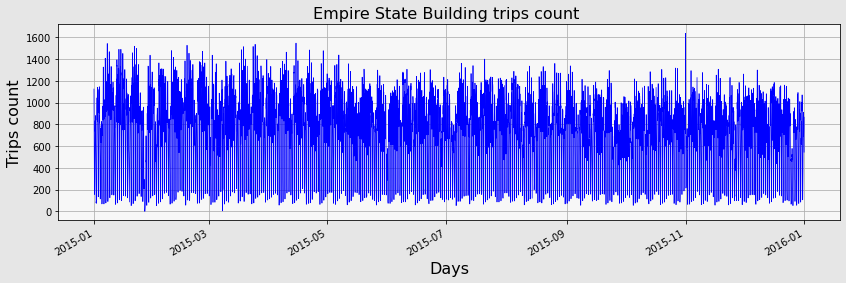

In [6]:
fig, ax = plt.subplots(figsize=(14,4))
fig.set_facecolor('.9')
ax.set_facecolor('.97')
grouped_index.Count.plot(color='b', linewidth=0.7)
ax.grid(axis='both')
plt.title('Empire State Building trips count ', fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Trips count', fontsize=16)

In [7]:
grouped_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8757 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   8757 non-null   int64
dtypes: int64(1)
memory usage: 136.8 KB


In [8]:
grouped_index.to_csv('D:\Asus\Work_DATA\Taxi\Downloads_DATA\series_1231\grouped_index_15.csv')
pd.read_csv('D:\Asus\Work_DATA\Taxi\Downloads_DATA\series_1231\grouped_index_15.csv', index_col='index')

,Count
index,
2015-01-01 00:00:00,1125
2015-01-01 01:00:00,922
2015-01-01 02:00:00,767
2015-01-01 03:00:00,774
2015-01-01 04:00:00,548
...,...
2015-12-31 19:00:00,763
2015-12-31 20:00:00,869
2015-12-31 21:00:00,798
